In [65]:
import pandas as pd
import numpy as np
from datetime import datetime
dataset = pd.ExcelFile(r"C:\Users\vidhy\Downloads\V02Max_Combined.xlsx")

Athletes = pd.read_excel(dataset, sheet_name = 'Athletes')
Kayaking = pd.read_excel(dataset, sheet_name = 'Kayaking')
Triathlon = pd.read_excel(dataset, sheet_name = 'Triathlon')
Fencing = pd.read_excel(dataset, sheet_name = 'Fencing')

C:\Users\vidhy\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\vidhy\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\vidhy\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [ ]:
#1)Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file?

In [66]:
combined=pd.concat([Kayaking,Triathlon,Fencing])
print(combined)

       ID     time     RR       VO2  power
0      11 -168.600  727.0  0.287147      0
1      11 -167.872  728.0  0.287147      0
2      11 -167.148  724.0  0.287147      0
3      11 -166.484  664.0  0.320580      0
4      11 -165.836  648.0  0.320580      0
...    ..      ...    ...       ...    ...
27598  10  942.700  428.0  0.786363      0
27599  10  943.124  424.0  0.786363      0
27600  10  943.552  428.0  0.786363      0
27601  10  943.976  424.0  0.786363      0
27602  10  944.404  428.0  0.786363      0

[52062 rows x 5 columns]


In [24]:
combined=pd.concat([Kayaking,Triathlon,Fencing])
print(combined)

def Heart_Rate(rr):
    return round(60*1000/rr,2)
def Heartrate_Zone(hr):
    if hr<100:
        return 'Zone 1 (recovery/easy)'
    elif hr>=100 and hr<120:
        return 'Zone 2 (Aerobic/base)'
    elif hr>=120 and hr<135:
        return 'Zone 3 (tempo)'
    elif hr>=135 and hr<155:
        return 'Zone 4 (Lactate threshold)'
    else:
        return 'Zone 5(AnAerobic)'
combined['HR']=combined['RR'].apply(Heart_Rate)
combined['HR_Zone']=combined['HR'].apply(Heartrate_Zone)
#pd.set_option('display.max_rows',1000)
print(combined)

       ID     time     RR       VO2  power
0      11 -168.600  727.0  0.287147      0
1      11 -167.872  728.0  0.287147      0
2      11 -167.148  724.0  0.287147      0
3      11 -166.484  664.0  0.320580      0
4      11 -165.836  648.0  0.320580      0
...    ..      ...    ...       ...    ...
27598  10  942.700  428.0  0.786363      0
27599  10  943.124  424.0  0.786363      0
27600  10  943.552  428.0  0.786363      0
27601  10  943.976  424.0  0.786363      0
27602  10  944.404  428.0  0.786363      0

[52062 rows x 5 columns]
       ID     time     RR       VO2  power      HR                     HR_Zone
0      11 -168.600  727.0  0.287147      0   82.53      Zone 1 (recovery/easy)
1      11 -167.872  728.0  0.287147      0   82.42      Zone 1 (recovery/easy)
2      11 -167.148  724.0  0.287147      0   82.87      Zone 1 (recovery/easy)
3      11 -166.484  664.0  0.320580      0   90.36      Zone 1 (recovery/easy)
4      11 -165.836  648.0  0.320580      0   92.59      Zone 1 

In [ ]:
#2)Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly?

In [88]:
conditions=[
    (combined['time']<0),
    (combined['time']>0) & (combined['power']>0),
    (combined['time']>0) & (combined['power']==0)
]
choices=['Warm up','Get','Cool down']
combined['stage']=np.select(conditions,choices,default='cool down')
print(combined)   

       ID     time     RR       VO2  power      stage
0      11 -168.600  727.0  0.287147      0    Warm up
1      11 -167.872  728.0  0.287147      0    Warm up
2      11 -167.148  724.0  0.287147      0    Warm up
3      11 -166.484  664.0  0.320580      0    Warm up
4      11 -165.836  648.0  0.320580      0    Warm up
...    ..      ...    ...       ...    ...        ...
27598  10  942.700  428.0  0.786363      0  Cool down
27599  10  943.124  424.0  0.786363      0  Cool down
27600  10  943.552  428.0  0.786363      0  Cool down
27601  10  943.976  424.0  0.786363      0  Cool down
27602  10  944.404  428.0  0.786363      0  Cool down

[52062 rows x 6 columns]


In [97]:
merged=pd.merge(Kayaking,Athletes, on='ID')
print(merged)

       ID      time     RR       VO2  power  age  Weight  Height  P_vt1  \
0      11  -168.600  727.0  0.287147      0   18    84.8     182    174   
1      11  -167.872  728.0  0.287147      0   18    84.8     182    174   
2      11  -167.148  724.0  0.287147      0   18    84.8     182    174   
3      11  -166.484  664.0  0.320580      0   18    84.8     182    174   
4      11  -165.836  648.0  0.320580      0   18    84.8     182    174   
...    ..       ...    ...       ...    ...  ...     ...     ...    ...   
19473  16  1118.404  548.0  0.671957      0   16    70.4     182     79   
19474  16  1118.944  540.0  0.671957      0   16    70.4     182     79   
19475  16  1119.484  540.0  0.671957      0   16    70.4     182     79   
19476  16  1120.016  532.0  0.671957      0   16    70.4     182     79   
19477  16  1120.544  528.0  0.671957      0   16    70.4     182     79   

       P_vt2  sport  Gender Ethnicity First Name Last Name  
0        268  kayak  Female   African 

In [ ]:
#3)What was the average time each tested lasted excluding warm up for all athletes?

In [70]:
test_combined=combined[combined['stage']!='Warm up'] 
avg_time=test_combined['time'].mean()
print(f'The average time each test lasted excluding warmup for all athelets is: {avg_time:.2f} seconds')

The average time each test lasted excluding warmup for all athelets is: 604.00 seconds


In [ ]:
#4)Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

In [86]:
avg_HRV_sport=merged.groupby('sport')['RR'].std()
print(avg_HRV_sport)
#avg_hr=avg_HRV_sport.groupby('sport')
#Highest_avg_HRV_sport=avg_hr.idxmax()
#Highest_HRV_value=avg_hr.max()
#print(f'The sport with highest average cadiorespiratory fitness in terms of HRV (RR interval) is {Highest_avg_HRV_sport} with an average HRV of {Highest_HRV_value:.2f}')

sport
fencing      193.056530
kayak        251.279363
triathlon    138.401081
Name: RR, dtype: float64


In [ ]:
#5)What was the average time each test lasted (including warm up) for all athletes?

In [99]:

#print(combined) 
Test_Warmup=merged[(combined['stage']=='Get') & (combined['stage']=='Warm up')]
print(Test_Warmup)
avg_time_warmup=Test_Warmup['time'].mean()
print(f'The average time each test lasted including warmup for all athelets is {avg_time_warmup:.2f} minutes')

Empty DataFrame
Columns: [ID, time, RR, VO2, power, age, Weight, Height, P_vt1, P_vt2, sport, Gender, Ethnicity, First Name, Last Name]
Index: []
The average time each test lasted including warmup for all athelets is nan minutes


C:\Users\vidhy\AppData\Local\Temp\ipykernel_14904\543884635.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Test_Warmup=merged[(combined['stage']=='Get') & (combined['stage']=='Warm up')]


In [ ]:
#6)What was the most common  wattage (above 0) achieved by participants and for how many seconds (average time)? You may choose to show averages based on any one/all sports. 

In [29]:
merged=merged[merged['power']>0]
wattage=merged['power'].mode()[0]
common_wattage=merged[merged['power'] == wattage]
average_time=common_wattage['time'].mean()
print(f'common wattage{wattage:.2f}average time:{average_time:.2f}')

common wattage50.00average time:94.53


In [ ]:
#7)Create a correlation matrix to show the relationship between HR, BMI and sport?

In [49]:
combined=pd.concat([Kayaking,Triathlon,Fencing])
#print(combined)

def Heart_Rate(rr):
    return round(60*1000/rr,2)
def Heartrate_Zone(hr):
    if hr<100:
        return 'Zone 1 (recovery/easy)'
    elif hr>=100 and hr<120:
        return 'Zone 2 (Aerobic/base)'
    elif hr>=120 and hr<135:
        return 'Zone 3 (tempo)'
    elif hr>=135 and hr<155:
        return 'Zone 4 (Lactate threshold)'
    else:
        return 'Zone 5(AnAerobic)'
combined['HR']=combined['RR'].apply(Heart_Rate)
combined['HR_Zone']=combined['HR'].apply(Heartrate_Zone)
#pd.set_option('display.max_rows',1000)
#print(combined)

In [47]:
Athletes['BMI']=Athletes['Weight']/(Athletes['Height']**2)
#print(Athletes)

In [46]:
merged=pd.merge(combined,Athletes,on='ID')
#print(merged)

In [35]:
merged['sport_num']=pd.factorize(merged['sport'])[0]
correlation_matrix=merged[['BMI','sport_num','HR']].corr()
print(correlation_matrix)

                BMI  sport_num        HR
BMI        1.000000  -0.346155 -0.056931
sport_num -0.346155   1.000000  0.039016
HR        -0.056931   0.039016  1.000000


In [ ]:
#8) What are the names of the kayaking athletes?

In [21]:
merged=pd.merge(Kayaking,Athletes, on='ID')
print(merged)

       ID      time     RR       VO2  power  age  Weight  Height  P_vt1  \
0      11  -168.600  727.0  0.287147      0   18    84.8     182    174   
1      11  -167.872  728.0  0.287147      0   18    84.8     182    174   
2      11  -167.148  724.0  0.287147      0   18    84.8     182    174   
3      11  -166.484  664.0  0.320580      0   18    84.8     182    174   
4      11  -165.836  648.0  0.320580      0   18    84.8     182    174   
...    ..       ...    ...       ...    ...  ...     ...     ...    ...   
19473  16  1118.404  548.0  0.671957      0   16    70.4     182     79   
19474  16  1118.944  540.0  0.671957      0   16    70.4     182     79   
19475  16  1119.484  540.0  0.671957      0   16    70.4     182     79   
19476  16  1120.016  532.0  0.671957      0   16    70.4     182     79   
19477  16  1120.544  528.0  0.671957      0   16    70.4     182     79   

       P_vt2  sport  Gender Ethnicity First Name Last Name       BMI  
0        268  kayak  Female 

In [ ]:
#9)What was the average HRV of the triathletes?

In [37]:
triathlon=merged[merged['sport']=='triathlon']
HRV=triathlon['RR'].std()
print(f"The average HRV of the Triathlon is {HRV:.2f}")

The average HRV of the Triathlon is 138.40


In [ ]:
#10)How long was athlete 12 in HR Zone 5?

In [38]:
Athelet_12= merged[merged['ID']==12]
Athelet_12_Zone5= Athelet_12[Athelet_12['HR_Zone']==5]
print(Athelet_12_Zone5)
Total_time=Athelet_12_Zone5['time'].sum()
print(Total_time)


Empty DataFrame
Columns: [ID, time, RR, VO2, power, HR, HR_Zone, age, Weight, Height, P_vt1, P_vt2, sport, Gender, Ethnicity, First Name, Last Name, BMI, sport_num]
Index: []
0.0


In [ ]:
#11)Create any 3d plot using any data. Values do not have to be from the dataset given?

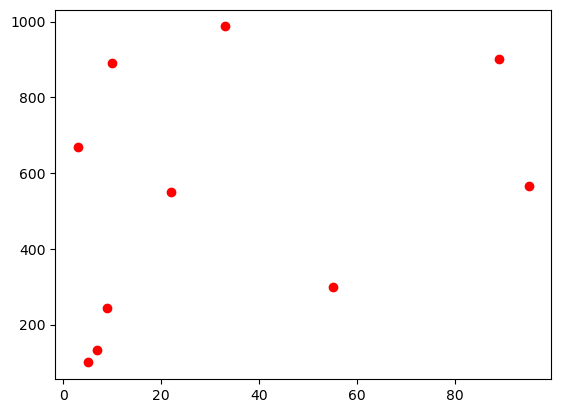

In [39]:
import matplotlib.pyplot as plt
x=[5,7,9,22,3,89,10,95,33,55]
y=[100,133,244,550,670,900,890,567,987,300]
plt.scatter(x,y,c='red')
plt.show()

In [54]:
merged['vo2_max']=merged['VO2']/merged['Weight']
print(merged)

       ID     time     RR       VO2  power      HR  \
0      11 -168.600  727.0  0.287147      0   82.53   
1      11 -167.872  728.0  0.287147      0   82.42   
2      11 -167.148  724.0  0.287147      0   82.87   
3      11 -166.484  664.0  0.320580      0   90.36   
4      11 -165.836  648.0  0.320580      0   92.59   
...    ..      ...    ...       ...    ...     ...   
52057  10  942.700  428.0  0.786363      0  140.19   
52058  10  943.124  424.0  0.786363      0  141.51   
52059  10  943.552  428.0  0.786363      0  140.19   
52060  10  943.976  424.0  0.786363      0  141.51   
52061  10  944.404  428.0  0.786363      0  140.19   

                          HR_Zone  age  Weight  Height  P_vt1  P_vt2    sport  \
0          Zone 1 (recovery/easy)   18    84.8     182    174    268    kayak   
1          Zone 1 (recovery/easy)   18    84.8     182    174    268    kayak   
2          Zone 1 (recovery/easy)   18    84.8     182    174    268    kayak   
3          Zone 1 (recovery

In [ ]:
#12)What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes?

In [55]:
Sorted_Combined=merged.sort_values(by ="vo2_max", ascending=False)
Sorted_Combined.head(3)

,ID,time,RR,VO2,power,HR,HR_Zone,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,DOB,BMI,vo2_max
23834,18,694.860,320.0,2.204238,185,187.50,Zone 5(AnAerobic),12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,2012,0.00159,0.055522
23835,18,695.176,316.0,2.204238,185,189.87,Zone 5(AnAerobic),12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,2012,0.00159,0.055522
23917,18,721.308,316.0,2.200426,200,189.87,Zone 5(AnAerobic),12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,2012,0.00159,0.055426


In [ ]:
#13)Calculate the year of birth of each athlete and store it as a column in the tables.

In [43]:
Athletes['DOB']=datetime.now().year-Athletes['age']
print(Athletes)

    ID  age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0    1   15    53.7     161     50    140    fencing  Female   African   
1    2   15    56.2     162     80    127    fencing    Male   African   
2    3   16    89.9     191    155    300    fencing    Male     White   
3    4   16    76.5     180    215    275    fencing    Male     White   
4    5   17    76.4     186    110    172    fencing  Female     White   
5    6   17    65.6     169    131    186    fencing  Female     White   
6    7   15    49.8     165     65    108    fencing  Female     White   
7    8   15    51.2     165     80    133    fencing  Female     White   
8    9   14    57.1     176     50    125    fencing  Female   African   
9   10   14    58.8     177    101    162    fencing  Female   African   
10  11   18    84.8     182    174    268      kayak  Female   African   
11  12   18    86.0     183    170    294      kayak    Male   African   
12  13   18    83.9     183    144    

In [ ]:
#14)What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

In [57]:
Sorted_Combined=merged.sort_values(by ="vo2_max", ascending=True)
Sorted_Combined.head(3)

,ID,time,RR,VO2,power,HR,HR_Zone,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,DOB,BMI,vo2_max
46781,9,-82.760,536.0,0.069354,0,111.94,Zone 2 (Aerobic/base),14,57.1,176,50,125,fencing,Female,African,Chloe,Price,2010,0.001843,0.001215
46779,9,-83.824,532.0,0.069354,0,112.78,Zone 2 (Aerobic/base),14,57.1,176,50,125,fencing,Female,African,Chloe,Price,2010,0.001843,0.001215
46780,9,-83.296,528.0,0.069354,0,113.64,Zone 2 (Aerobic/base),14,57.1,176,50,125,fencing,Female,African,Chloe,Price,2010,0.001843,0.001215


In [ ]:
#15) Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table:
#Zone 1 (recovery/easy)       <100 HR max
#Zone 2 (aerobic/base)        100-120 HR max
#Zone 3 (tempo)        120-135 HR max
#Zone 4 (lactate threshold)        135-155 HR max
#Zone 5 (anaerobic)        155+ HR max and above

In [44]:
combined=pd.concat([Kayaking,Triathlon,Fencing])
print(combined)

def Heart_Rate(rr):
    return round(60*1000/rr,2)
def Heartrate_Zone(hr):
    if hr<100:
        return 'Zone 1 (recovery/easy)'
    elif hr>=100 and hr<120:
        return 'Zone 2 (Aerobic/base)'
    elif hr>=120 and hr<135:
        return 'Zone 3 (tempo)'
    elif hr>=135 and hr<155:
        return 'Zone 4 (Lactate threshold)'
    else:
        return 'Zone 5(AnAerobic)'
combined['HR']=combined['RR'].apply(Heart_Rate)
combined['HR_Zone']=combined['HR'].apply(Heartrate_Zone)
#pd.set_option('display.max_rows',1000)
print(combined)

       ID     time     RR       VO2  power
0      11 -168.600  727.0  0.287147      0
1      11 -167.872  728.0  0.287147      0
2      11 -167.148  724.0  0.287147      0
3      11 -166.484  664.0  0.320580      0
4      11 -165.836  648.0  0.320580      0
...    ..      ...    ...       ...    ...
27598  10  942.700  428.0  0.786363      0
27599  10  943.124  424.0  0.786363      0
27600  10  943.552  428.0  0.786363      0
27601  10  943.976  424.0  0.786363      0
27602  10  944.404  428.0  0.786363      0

[52062 rows x 5 columns]
       ID     time     RR       VO2  power      HR                     HR_Zone
0      11 -168.600  727.0  0.287147      0   82.53      Zone 1 (recovery/easy)
1      11 -167.872  728.0  0.287147      0   82.42      Zone 1 (recovery/easy)
2      11 -167.148  724.0  0.287147      0   82.87      Zone 1 (recovery/easy)
3      11 -166.484  664.0  0.320580      0   90.36      Zone 1 (recovery/easy)
4      11 -165.836  648.0  0.320580      0   92.59      Zone 1 

In [63]:
merged['HR_MAX']=220-merged['age']
print(merged)

       ID     time     RR       VO2  power      HR  \
0      11 -168.600  727.0  0.287147      0   82.53   
1      11 -167.872  728.0  0.287147      0   82.42   
2      11 -167.148  724.0  0.287147      0   82.87   
3      11 -166.484  664.0  0.320580      0   90.36   
4      11 -165.836  648.0  0.320580      0   92.59   
...    ..      ...    ...       ...    ...     ...   
52057  10  942.700  428.0  0.786363      0  140.19   
52058  10  943.124  424.0  0.786363      0  141.51   
52059  10  943.552  428.0  0.786363      0  140.19   
52060  10  943.976  424.0  0.786363      0  141.51   
52061  10  944.404  428.0  0.786363      0  140.19   

                          HR_Zone  age  Weight  Height  ...  P_vt2    sport  \
0          Zone 1 (recovery/easy)   18    84.8     182  ...    268    kayak   
1          Zone 1 (recovery/easy)   18    84.8     182  ...    268    kayak   
2          Zone 1 (recovery/easy)   18    84.8     182  ...    268    kayak   
3          Zone 1 (recovery/easy)  

In [ ]:
#16)Calculate the BMI of every athlete and display it as a list?

In [45]:
Athletes['BMI']=Athletes['Weight']/(Athletes['Height']**2)
print(Athletes)

    ID  age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0    1   15    53.7     161     50    140    fencing  Female   African   
1    2   15    56.2     162     80    127    fencing    Male   African   
2    3   16    89.9     191    155    300    fencing    Male     White   
3    4   16    76.5     180    215    275    fencing    Male     White   
4    5   17    76.4     186    110    172    fencing  Female     White   
5    6   17    65.6     169    131    186    fencing  Female     White   
6    7   15    49.8     165     65    108    fencing  Female     White   
7    8   15    51.2     165     80    133    fencing  Female     White   
8    9   14    57.1     176     50    125    fencing  Female   African   
9   10   14    58.8     177    101    162    fencing  Female   African   
10  11   18    84.8     182    174    268      kayak  Female   African   
11  12   18    86.0     183    170    294      kayak    Male   African   
12  13   18    83.9     183    144    

In [58]:
#print(merged)
merged['vo2_max']=merged['VO2']/merged['Weight']
Sorted_Combined=merged.sort_values(by ="vo2_max", ascending=True)
#Sorted_Combined.head(3)
#print(merged)